# Modern Data Analytics - Project

### Group: Croatia

## 1. Exploratory data analysis

#### Load data from one location (Maxim'O) in one month (March)

In [1]:
import os
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/ineaertgeerts/opt/ModernDataAnalytics'

In [2]:
noise_Maximo_March_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_Maximo_March_df.head()

,#object_id,description,result_timestamp,lamax,laeq
0,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:00.462,60.5,57.9
1,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:01.462,54.1,53.2
2,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:02.462,61.4,57.5
3,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:03.462,61.3,59.1
4,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:04.462,61.1,58.4


#### Analyse missing data

In [3]:
#Some seconds are missing
len(noise_Maximo_March_df)

2674545

In [4]:
noise_Maximo_March_df.isna().sum()

#object_id          0
description         0
result_timestamp    0
lamax               0
laeq                0
dtype: int64

#### Cluster the data per minute

In [5]:
#First convert result_timestamp to datetime object
noise_Maximo_March_df['datetime'] = pd.to_datetime(noise_Maximo_March_df['result_timestamp'], format="%d/%m/%Y %H:%M:%S.%f")
noise_Maximo_March_df.head()

,#object_id,description,result_timestamp,lamax,laeq,datetime
0,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:00.462,60.5,57.9,2022-03-01 00:00:00.462
1,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:01.462,54.1,53.2,2022-03-01 00:00:01.462
2,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:02.462,61.4,57.5,2022-03-01 00:00:02.462
3,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:03.462,61.3,59.1,2022-03-01 00:00:03.462
4,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:04.462,61.1,58.4,2022-03-01 00:00:04.462


In [6]:
#Cluster data per minute
noise_Maximo_March_cluster1M_df = noise_Maximo_March_df.groupby(pd.Grouper(key='datetime',freq='T')).mean().reset_index()
noise_Maximo_March_cluster1M_df

,datetime,#object_id,lamax,laeq
0,2022-03-01 00:00:00,255439.0,62.230000,59.518333
1,2022-03-01 00:01:00,255439.0,61.503333,58.865000
2,2022-03-01 00:02:00,255439.0,64.036667,61.433333
3,2022-03-01 00:03:00,255439.0,62.131667,59.751667
4,2022-03-01 00:04:00,255439.0,61.995000,59.126667
...,...,...,...,...
44635,2022-03-31 23:55:00,255439.0,67.755000,64.626667
44636,2022-03-31 23:56:00,255439.0,62.551667,59.956667
44637,2022-03-31 23:57:00,255439.0,65.176667,62.476667
44638,2022-03-31 23:58:00,255439.0,60.433333,58.160000


In [7]:
#Create new variables with the date and time
noise_Maximo_March_cluster1M_df['date'] = noise_Maximo_March_cluster1M_df['datetime'].dt.date
noise_Maximo_March_cluster1M_df['time'] = noise_Maximo_March_cluster1M_df['datetime'].dt.time
noise_Maximo_March_cluster1M_df['date'] = noise_Maximo_March_cluster1M_df['date'].astype(str)
noise_Maximo_March_cluster1M_df['time'] = noise_Maximo_March_cluster1M_df['time'].astype(str)
noise_Maximo_March_cluster1M_df.head()

,datetime,#object_id,lamax,laeq,date,time
0,2022-03-01 00:00:00,255439.0,62.230000,59.518333,2022-03-01,00:00:00
1,2022-03-01 00:01:00,255439.0,61.503333,58.865000,2022-03-01,00:01:00
2,2022-03-01 00:02:00,255439.0,64.036667,61.433333,2022-03-01,00:02:00
3,2022-03-01 00:03:00,255439.0,62.131667,59.751667,2022-03-01,00:03:00
4,2022-03-01 00:04:00,255439.0,61.995000,59.126667,2022-03-01,00:04:00


In [8]:
len(noise_Maximo_March_cluster1M_df)

44640

#### Also cluster the data per 10 minutes and per hour

In [9]:
#Cluster data per 10 minutes
noise_Maximo_March_cluster10M_df = noise_Maximo_March_df.groupby(pd.Grouper(key='datetime',freq='10T')).mean().reset_index()
#Cluster data per hour
noise_Maximo_March_cluster1H_df = noise_Maximo_March_df.groupby(pd.Grouper(key='datetime',freq='H')).mean().reset_index()
#Create new variables with the date and time
noise_Maximo_March_cluster10M_df['date'] = noise_Maximo_March_cluster10M_df['datetime'].dt.date
noise_Maximo_March_cluster10M_df['time'] = noise_Maximo_March_cluster10M_df['datetime'].dt.time
noise_Maximo_March_cluster10M_df['date'] = noise_Maximo_March_cluster10M_df['date'].astype(str)
noise_Maximo_March_cluster10M_df['time'] = noise_Maximo_March_cluster10M_df['time'].astype(str)
noise_Maximo_March_cluster1H_df['date'] = noise_Maximo_March_cluster1H_df['datetime'].dt.date
noise_Maximo_March_cluster1H_df['time'] = noise_Maximo_March_cluster1H_df['datetime'].dt.time
noise_Maximo_March_cluster1H_df['date'] = noise_Maximo_March_cluster1H_df['date'].astype(str)
noise_Maximo_March_cluster1H_df['time'] = noise_Maximo_March_cluster1H_df['time'].astype(str)

In [10]:
noise_Maximo_March_cluster10M_df

,datetime,#object_id,lamax,laeq,date,time
0,2022-03-01 00:00:00,255439.0,61.895667,59.346167,2022-03-01,00:00:00
1,2022-03-01 00:10:00,255439.0,64.111000,61.352500,2022-03-01,00:10:00
2,2022-03-01 00:20:00,255439.0,62.693167,60.319167,2022-03-01,00:20:00
3,2022-03-01 00:30:00,255439.0,65.048833,62.527667,2022-03-01,00:30:00
4,2022-03-01 00:40:00,255439.0,62.137500,59.808500,2022-03-01,00:40:00
...,...,...,...,...,...,...
4459,2022-03-31 23:10:00,255439.0,63.504833,60.900000,2022-03-31,23:10:00
4460,2022-03-31 23:20:00,255439.0,61.351000,59.005667,2022-03-31,23:20:00
4461,2022-03-31 23:30:00,255439.0,62.417833,60.175500,2022-03-31,23:30:00
4462,2022-03-31 23:40:00,255439.0,60.690000,58.532000,2022-03-31,23:40:00


In [11]:
noise_Maximo_March_cluster1H_df

,datetime,#object_id,lamax,laeq,date,time
0,2022-03-01 00:00:00,255439.0,63.333278,60.815722,2022-03-01,00:00:00
1,2022-03-01 01:00:00,255439.0,66.931333,64.313111,2022-03-01,01:00:00
2,2022-03-01 02:00:00,255439.0,65.499028,62.869667,2022-03-01,02:00:00
3,2022-03-01 03:00:00,255439.0,65.472861,62.768556,2022-03-01,03:00:00
4,2022-03-01 04:00:00,255439.0,57.743139,54.550611,2022-03-01,04:00:00
...,...,...,...,...,...,...
739,2022-03-31 19:00:00,255439.0,58.184472,56.291111,2022-03-31,19:00:00
740,2022-03-31 20:00:00,255439.0,57.108361,55.148583,2022-03-31,20:00:00
741,2022-03-31 21:00:00,255439.0,57.873111,55.905583,2022-03-31,21:00:00
742,2022-03-31 22:00:00,255439.0,61.577167,59.378889,2022-03-31,22:00:00


#### Plots

#### Only data from the first day (2022-03-01)

In [12]:
#Get the data from the first day
day1_1M_df = noise_Maximo_March_cluster1M_df.head(1440)
day1_10M_df = noise_Maximo_March_cluster10M_df.head(144)
day1_1H_df = noise_Maximo_March_cluster1H_df.head(24)

In [13]:
day1_1M_df

,datetime,#object_id,lamax,laeq,date,time
0,2022-03-01 00:00:00,255439.0,62.230000,59.518333,2022-03-01,00:00:00
1,2022-03-01 00:01:00,255439.0,61.503333,58.865000,2022-03-01,00:01:00
2,2022-03-01 00:02:00,255439.0,64.036667,61.433333,2022-03-01,00:02:00
3,2022-03-01 00:03:00,255439.0,62.131667,59.751667,2022-03-01,00:03:00
4,2022-03-01 00:04:00,255439.0,61.995000,59.126667,2022-03-01,00:04:00
...,...,...,...,...,...,...
1435,2022-03-01 23:55:00,255439.0,60.328333,57.956667,2022-03-01,23:55:00
1436,2022-03-01 23:56:00,255439.0,63.065000,60.678333,2022-03-01,23:56:00
1437,2022-03-01 23:57:00,255439.0,63.938333,61.450000,2022-03-01,23:57:00
1438,2022-03-01 23:58:00,255439.0,57.975000,55.595000,2022-03-01,23:58:00


In [14]:
day1_10M_df

,datetime,#object_id,lamax,laeq,date,time
0,2022-03-01 00:00:00,255439.0,61.895667,59.346167,2022-03-01,00:00:00
1,2022-03-01 00:10:00,255439.0,64.111000,61.352500,2022-03-01,00:10:00
2,2022-03-01 00:20:00,255439.0,62.693167,60.319167,2022-03-01,00:20:00
3,2022-03-01 00:30:00,255439.0,65.048833,62.527667,2022-03-01,00:30:00
4,2022-03-01 00:40:00,255439.0,62.137500,59.808500,2022-03-01,00:40:00
...,...,...,...,...,...,...
139,2022-03-01 23:10:00,255439.0,59.547667,57.299167,2022-03-01,23:10:00
140,2022-03-01 23:20:00,255439.0,57.535500,55.190500,2022-03-01,23:20:00
141,2022-03-01 23:30:00,255439.0,58.091500,55.670500,2022-03-01,23:30:00
142,2022-03-01 23:40:00,255439.0,59.475333,57.180333,2022-03-01,23:40:00


In [15]:
day1_1H_df

,datetime,#object_id,lamax,laeq,date,time
0,2022-03-01 00:00:00,255439.0,63.333278,60.815722,2022-03-01,00:00:00
1,2022-03-01 01:00:00,255439.0,66.931333,64.313111,2022-03-01,01:00:00
2,2022-03-01 02:00:00,255439.0,65.499028,62.869667,2022-03-01,02:00:00
3,2022-03-01 03:00:00,255439.0,65.472861,62.768556,2022-03-01,03:00:00
4,2022-03-01 04:00:00,255439.0,57.743139,54.550611,2022-03-01,04:00:00
5,2022-03-01 05:00:00,255439.0,48.926944,45.338139,2022-03-01,05:00:00
6,2022-03-01 06:00:00,255439.0,50.729833,47.580639,2022-03-01,06:00:00
7,2022-03-01 07:00:00,255439.0,54.111389,51.684750,2022-03-01,07:00:00
8,2022-03-01 08:00:00,255439.0,59.214667,57.477500,2022-03-01,08:00:00
9,2022-03-01 09:00:00,255439.0,56.462889,54.775500,2022-03-01,09:00:00


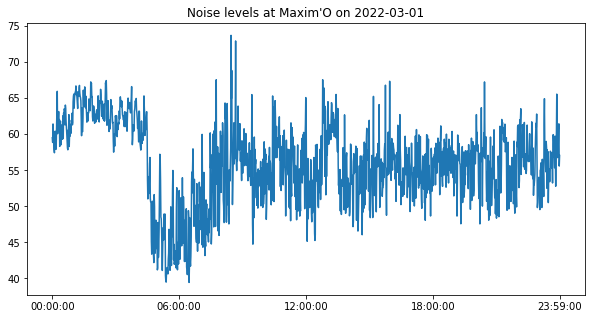

In [16]:
#Data clustered per minute
plt.figure(figsize=(10,5))
plt.plot(day1_1M_df['time'], day1_1M_df['laeq'])
plt.title("Noise levels at Maxim'O on 2022-03-01")
plt.xticks(['00:00:00', '06:00:00', '12:00:00', '18:00:00', '23:59:00'])
plt.show()

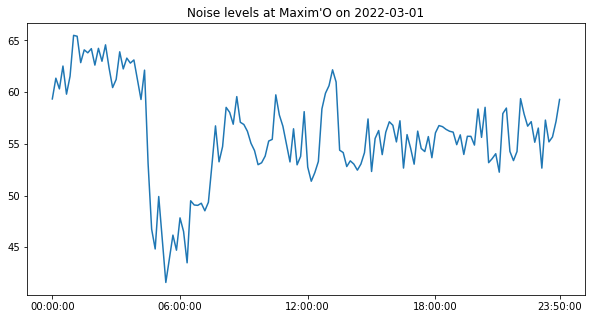

In [17]:
#Data clustered per 10 minutes
plt.figure(figsize=(10,5))
plt.plot(day1_10M_df['time'], day1_10M_df['laeq'])
plt.title("Noise levels at Maxim'O on 2022-03-01")
plt.xticks(['00:00:00', '06:00:00', '12:00:00', '18:00:00', '23:50:00'])
plt.show()

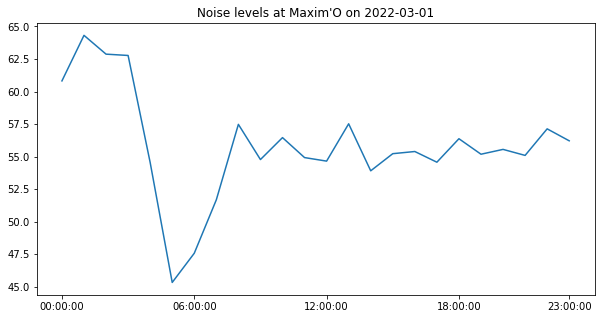

In [18]:
#Data clustered per hour
plt.figure(figsize=(10,5))
plt.plot(day1_1H_df['time'], day1_1H_df['laeq'])
plt.title("Noise levels at Maxim'O on 2022-03-01")
plt.xticks(['00:00:00', '06:00:00', '12:00:00', '18:00:00', '23:00:00'])
plt.show()

Noise levels are the lowest at around 6am

#### Only data from the first week

In [19]:
#Get the data from the first week
week1_1H_df = noise_Maximo_March_cluster1H_df.head(168)
week1_1H_df

,datetime,#object_id,lamax,laeq,date,time
0,2022-03-01 00:00:00,255439.0,63.333278,60.815722,2022-03-01,00:00:00
1,2022-03-01 01:00:00,255439.0,66.931333,64.313111,2022-03-01,01:00:00
2,2022-03-01 02:00:00,255439.0,65.499028,62.869667,2022-03-01,02:00:00
3,2022-03-01 03:00:00,255439.0,65.472861,62.768556,2022-03-01,03:00:00
4,2022-03-01 04:00:00,255439.0,57.743139,54.550611,2022-03-01,04:00:00
...,...,...,...,...,...,...
163,2022-03-07 19:00:00,255439.0,56.534250,54.555306,2022-03-07,19:00:00
164,2022-03-07 20:00:00,255439.0,55.661750,53.537250,2022-03-07,20:00:00
165,2022-03-07 21:00:00,255439.0,55.352000,53.318278,2022-03-07,21:00:00
166,2022-03-07 22:00:00,255439.0,58.440222,56.151556,2022-03-07,22:00:00


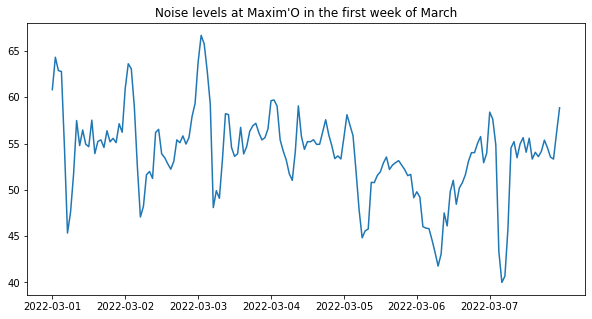

In [20]:
#Data clustered per hour
plt.figure(figsize=(10,5))
plt.plot(week1_1H_df['datetime'], week1_1H_df['laeq'])
plt.title("Noise levels at Maxim'O in the first week of March")
plt.xticks(['2022-03-01 00:00:00', '2022-03-02 00:00:00', '2022-03-03 00:00:00', '2022-03-04 00:00:00', '2022-03-05 00:00:00', '2022-03-06 00:00:00', '2022-03-07 00:00:00'],
        ['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07'])
plt.show()

2022-03-01 was a Tuesday

#### All data from the whole month of March

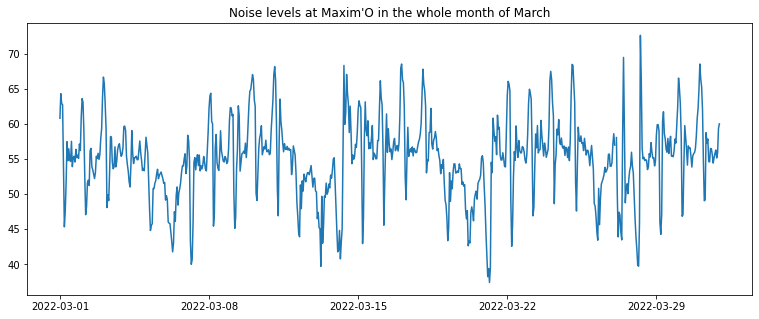

In [21]:
#Data clustered per hour
plt.figure(figsize=(13,5))
plt.plot(noise_Maximo_March_cluster1H_df['datetime'], noise_Maximo_March_cluster1H_df['laeq'])
plt.title("Noise levels at Maxim'O in the whole month of March")
plt.xticks(['2022-03-01 00:00:00', '2022-03-08 00:00:00', '2022-03-15 00:00:00', '2022-03-22 00:00:00', '2022-03-29 00:00:00'],
        ['2022-03-01', '2022-03-08', '2022-03-15', '2022-03-22', '2022-03-29'])
plt.show()

#### EDA on full dataset

#### Make one big dataframe with all noise data

In [22]:
#Load all data (all months and all locations)
#January
ID255439_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Jan_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jan/csv_results_42_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#February
ID255439_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Feb_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Feb/csv_results_42_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#March
ID255439_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Mar_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/March/csv_results_44_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#April
ID255439_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Apr_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/April/csv_results_45_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#May
ID255439_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_May_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/May/csv_results_46_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#June
ID255439_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Jun_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/June/csv_results_47_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#July
ID255439_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Jul_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Jul/csv_results_48_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#August
ID255439_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Aug_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Aug/csv_results_49_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#September
ID255439_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Sep_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Sep/csv_results_50_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#October
ID255439_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Oct_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Oct/csv_results_51_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#November
ID255439_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Nov_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Nov/csv_results_52_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
#December
ID255439_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_255439_mp-01-naamsestraat-35-maxim.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255440_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_255440_mp-02-naamsestraat-57-xior.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255441_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_255441_mp-03-naamsestraat-62-taste.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255442_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_255442_mp-05-calvariekapel-ku-leuven.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255443_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_255443_mp-06-parkstraat-2-la-filosovia.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255444_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_255444_mp-07-naamsestraat-81.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID255445_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_255445_mp-08-kiosk-stadspark.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID280324_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_280324_mp08bis---vrijthof.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
ID303910_Dec_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/Dec/csv_results_53_303910_mp-04-his-hears.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])

In [23]:
#Make one big dataframe
noise_df = pd.concat([
    ID255439_Jan_df,ID255440_Jan_df,ID255441_Jan_df,ID255442_Jan_df,ID255443_Jan_df,ID255444_Jan_df,ID255445_Jan_df,ID280324_Jan_df,ID303910_Jan_df,
    ID255439_Feb_df,ID255440_Feb_df,ID255441_Feb_df,ID255442_Feb_df,ID255443_Feb_df,ID255444_Feb_df,ID255445_Feb_df,ID280324_Feb_df,ID303910_Feb_df,
    ID255439_Mar_df,ID255440_Mar_df,ID255441_Mar_df,ID255442_Mar_df,ID255443_Mar_df,ID255444_Mar_df,ID255445_Mar_df,ID280324_Mar_df,ID303910_Mar_df,
    ID255439_Apr_df,ID255440_Apr_df,ID255441_Apr_df,ID255442_Apr_df,ID255443_Apr_df,ID255444_Apr_df,ID255445_Apr_df,ID280324_Apr_df,ID303910_Apr_df,
    ID255439_May_df,ID255440_May_df,ID255441_May_df,ID255442_May_df,ID255443_May_df,ID255444_May_df,ID255445_May_df,ID280324_May_df,ID303910_May_df,
    ID255439_Jun_df,ID255440_Jun_df,ID255441_Jun_df,ID255442_Jun_df,ID255443_Jun_df,ID255444_Jun_df,ID255445_Jun_df,ID280324_Jun_df,ID303910_Jun_df,
    ID255439_Jul_df,ID255440_Jul_df,ID255441_Jul_df,ID255442_Jul_df,ID255443_Jul_df,ID255444_Jul_df,ID255445_Jul_df,ID280324_Jul_df,ID303910_Jul_df,
    ID255439_Aug_df,ID255440_Aug_df,ID255441_Aug_df,ID255442_Aug_df,ID255443_Aug_df,ID255444_Aug_df,ID255445_Aug_df,ID280324_Aug_df,ID303910_Aug_df,
    ID255439_Sep_df,ID255440_Sep_df,ID255441_Sep_df,ID255442_Sep_df,ID255443_Sep_df,ID255444_Sep_df,ID255445_Sep_df,ID280324_Sep_df,ID303910_Sep_df,
    ID255439_Oct_df,ID255440_Oct_df,ID255441_Oct_df,ID255442_Oct_df,ID255443_Oct_df,ID255444_Oct_df,ID255445_Oct_df,ID280324_Oct_df,ID303910_Oct_df,
    ID255439_Nov_df,ID255440_Nov_df,ID255441_Nov_df,ID255442_Nov_df,ID255443_Nov_df,ID255444_Nov_df,ID255445_Nov_df,ID280324_Nov_df,ID303910_Nov_df,
    ID255439_Dec_df,ID255440_Dec_df,ID255441_Dec_df,ID255442_Dec_df,ID255443_Dec_df,ID255444_Dec_df,ID255445_Dec_df,ID280324_Dec_df,ID303910_Dec_df])

In [24]:
noise_df.head()

,#object_id,description,result_timestamp,lamax,laeq
0,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:00.349,87.6,82.7
1,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:01.349,84.5,83.1
2,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:02.349,84.8,82.7
3,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:03.349,81.9,79.3
4,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:04.349,78.3,76.0


In [25]:
len(noise_df)

199412506

#### Cluster the data per minute and per hour

In [26]:
#First convert result_timestamp to datetime object
noise_df['datetime'] = pd.to_datetime(noise_df['result_timestamp'],format="%d/%m/%Y %H:%M:%S.%f")
noise_df.head()

,#object_id,description,result_timestamp,lamax,laeq,datetime
0,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:00.349,87.6,82.7,2022-01-01 00:00:00.349
1,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:01.349,84.5,83.1,2022-01-01 00:00:01.349
2,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:02.349,84.8,82.7,2022-01-01 00:00:02.349
3,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:03.349,81.9,79.3,2022-01-01 00:00:03.349
4,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:04.349,78.3,76.0,2022-01-01 00:00:04.349


In [28]:
#Rename 'object_id' column
noise_df.rename(columns={'#object_id':'object_id'},inplace=True)
noise_df.head()

,object_id,description,result_timestamp,lamax,laeq,datetime
0,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:00.349,87.6,82.7,2022-01-01 00:00:00.349
1,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:01.349,84.5,83.1,2022-01-01 00:00:01.349
2,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:02.349,84.8,82.7,2022-01-01 00:00:02.349
3,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:03.349,81.9,79.3,2022-01-01 00:00:03.349
4,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:04.349,78.3,76.0,2022-01-01 00:00:04.349


In [29]:
#Cluster data per minute
noise_per_minute_df = noise_df.groupby(['object_id',pd.Grouper(key='datetime',freq='T')]).mean().reset_index()
noise_per_minute_df

,object_id,datetime,lamax,laeq
0,255439,2022-02-28 08:23:00,62.567647,61.132353
1,255439,2022-02-28 08:24:00,54.045000,51.596667
2,255439,2022-02-28 08:25:00,54.478333,52.070000
3,255439,2022-02-28 08:26:00,58.978333,58.123333
4,255439,2022-02-28 08:27:00,72.333333,71.656667
...,...,...,...,...
3323497,303910,2022-12-31 23:55:00,62.956667,59.861667
3323498,303910,2022-12-31 23:56:00,62.316667,60.060000
3323499,303910,2022-12-31 23:57:00,63.771667,61.053333
3323500,303910,2022-12-31 23:58:00,59.316667,57.003333


In [30]:
#Cluster data per hour
noise_per_hour_df = noise_df.groupby(['object_id',pd.Grouper(key='datetime',freq='H')]).mean().reset_index()
noise_per_hour_df

,object_id,datetime,lamax,laeq
0,255439,2022-02-28 08:00:00,58.679893,56.965367
1,255439,2022-02-28 13:00:00,57.610063,55.556352
2,255439,2022-02-28 14:00:00,57.101721,55.100833
3,255439,2022-02-28 15:00:00,56.258222,54.167056
4,255439,2022-02-28 16:00:00,57.101444,54.979111
...,...,...,...,...
55464,303910,2022-12-31 19:00:00,57.366833,55.689139
55465,303910,2022-12-31 20:00:00,56.131472,54.247000
55466,303910,2022-12-31 21:00:00,54.670528,52.724444
55467,303910,2022-12-31 22:00:00,55.364222,53.355944


#### Add extra variables to the datasets

In [31]:
#Create new variables with the date and time
noise_per_minute_df['date'] = noise_per_minute_df['datetime'].dt.date
noise_per_minute_df['time'] = noise_per_minute_df['datetime'].dt.time
noise_per_minute_df['date'] = noise_per_minute_df['date'].astype(str)
noise_per_minute_df['time'] = noise_per_minute_df['time'].astype(str)

#Add the month
noise_per_minute_df['month'] = noise_per_minute_df['datetime'].dt.month

#Add the day of the week
noise_per_minute_df['day_name'] = noise_per_minute_df['datetime'].dt.day_name()
noise_per_minute_df['day_name'] = noise_per_minute_df['day_name'].astype(str)
noise_per_minute_df['day_of_week'] = noise_per_minute_df['datetime'].dt.dayofweek

#Add whether it's the weekend or not
noise_per_minute_df['weekend'] = noise_per_minute_df['day_name'].isin(['Saturday','Sunday'])

#Add the day of the week + the time
noise_per_minute_df['daytime'] = noise_per_minute_df['day_name'] + noise_per_minute_df['time']

noise_per_minute_df

,object_id,datetime,lamax,laeq,date,time,month,day_name,day_of_week,weekend,daytime
0,255439,2022-02-28 08:23:00,62.567647,61.132353,2022-02-28,08:23:00,2,Monday,0,False,Monday08:23:00
1,255439,2022-02-28 08:24:00,54.045000,51.596667,2022-02-28,08:24:00,2,Monday,0,False,Monday08:24:00
2,255439,2022-02-28 08:25:00,54.478333,52.070000,2022-02-28,08:25:00,2,Monday,0,False,Monday08:25:00
3,255439,2022-02-28 08:26:00,58.978333,58.123333,2022-02-28,08:26:00,2,Monday,0,False,Monday08:26:00
4,255439,2022-02-28 08:27:00,72.333333,71.656667,2022-02-28,08:27:00,2,Monday,0,False,Monday08:27:00
...,...,...,...,...,...,...,...,...,...,...,...
3323497,303910,2022-12-31 23:55:00,62.956667,59.861667,2022-12-31,23:55:00,12,Saturday,5,True,Saturday23:55:00
3323498,303910,2022-12-31 23:56:00,62.316667,60.060000,2022-12-31,23:56:00,12,Saturday,5,True,Saturday23:56:00
3323499,303910,2022-12-31 23:57:00,63.771667,61.053333,2022-12-31,23:57:00,12,Saturday,5,True,Saturday23:57:00
3323500,303910,2022-12-31 23:58:00,59.316667,57.003333,2022-12-31,23:58:00,12,Saturday,5,True,Saturday23:58:00


In [32]:
#Create new variables with the date and time
noise_per_hour_df['date'] = noise_per_hour_df['datetime'].dt.date
noise_per_hour_df['time'] = noise_per_hour_df['datetime'].dt.time
noise_per_hour_df['date'] = noise_per_hour_df['date'].astype(str)
noise_per_hour_df['time'] = noise_per_hour_df['time'].astype(str)

#Add the month
noise_per_hour_df['month'] = noise_per_hour_df['datetime'].dt.month

#Add the day of the week
noise_per_hour_df['day_name'] = noise_per_hour_df['datetime'].dt.day_name()
noise_per_hour_df['day_name'] = noise_per_hour_df['day_name'].astype(str)
noise_per_hour_df['day_of_week'] = noise_per_hour_df['datetime'].dt.dayofweek

#Add whether it's the weekend or not
noise_per_hour_df['weekend'] = noise_per_hour_df['day_name'].isin(['Saturday','Sunday'])

#Add the day of the week + the time
noise_per_hour_df['daytime'] = noise_per_hour_df['day_name'] + noise_per_hour_df['time']

noise_per_hour_df

,object_id,datetime,lamax,laeq,date,time,month,day_name,day_of_week,weekend,daytime
0,255439,2022-02-28 08:00:00,58.679893,56.965367,2022-02-28,08:00:00,2,Monday,0,False,Monday08:00:00
1,255439,2022-02-28 13:00:00,57.610063,55.556352,2022-02-28,13:00:00,2,Monday,0,False,Monday13:00:00
2,255439,2022-02-28 14:00:00,57.101721,55.100833,2022-02-28,14:00:00,2,Monday,0,False,Monday14:00:00
3,255439,2022-02-28 15:00:00,56.258222,54.167056,2022-02-28,15:00:00,2,Monday,0,False,Monday15:00:00
4,255439,2022-02-28 16:00:00,57.101444,54.979111,2022-02-28,16:00:00,2,Monday,0,False,Monday16:00:00
...,...,...,...,...,...,...,...,...,...,...,...
55464,303910,2022-12-31 19:00:00,57.366833,55.689139,2022-12-31,19:00:00,12,Saturday,5,True,Saturday19:00:00
55465,303910,2022-12-31 20:00:00,56.131472,54.247000,2022-12-31,20:00:00,12,Saturday,5,True,Saturday20:00:00
55466,303910,2022-12-31 21:00:00,54.670528,52.724444,2022-12-31,21:00:00,12,Saturday,5,True,Saturday21:00:00
55467,303910,2022-12-31 22:00:00,55.364222,53.355944,2022-12-31,22:00:00,12,Saturday,5,True,Saturday22:00:00


#### Write the complete datasets to CSV files

In [33]:
#noise_df and noise_per_minute_df datasets are too big, break down into smaller pieces

#noise_df.to_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_df.csv',index=False)

noise_per_minute_df1 = noise_per_minute_df[0:1000001]
noise_per_minute_df2 = noise_per_minute_df[1000001:2000001]
noise_per_minute_df3 = noise_per_minute_df[2000001:3000001]
noise_per_minute_df4 = noise_per_minute_df[3000001:]
noise_per_minute_df1.to_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_minute_df1.csv',index=False)  
noise_per_minute_df2.to_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_minute_df2.csv',index=False) 
noise_per_minute_df3.to_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_minute_df3.csv',index=False) 
noise_per_minute_df4.to_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_minute_df4.csv',index=False) 

noise_per_hour_df.to_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_hour_df.csv',index=False)  

#### Look at the average noise levels during the days of the week

In [34]:
average_noise_df = noise_per_hour_df.groupby('daytime').mean().reset_index()
average_noise_df = average_noise_df[['daytime','lamax','laeq','day_of_week']]
average_noise_df = average_noise_df.sort_values(['day_of_week','daytime'])
average_noise_df

,daytime,lamax,laeq,day_of_week
24,Monday00:00:00,46.153846,44.068666,0.0
25,Monday01:00:00,43.652071,41.620389,0.0
26,Monday02:00:00,42.272902,40.305938,0.0
27,Monday03:00:00,41.273256,39.400582,0.0
28,Monday04:00:00,41.449384,39.607516,0.0
...,...,...,...,...
91,Sunday19:00:00,54.765865,53.044122,6.0
92,Sunday20:00:00,54.908204,53.227524,6.0
93,Sunday21:00:00,54.389722,52.661821,6.0
94,Sunday22:00:00,52.061519,50.187428,6.0


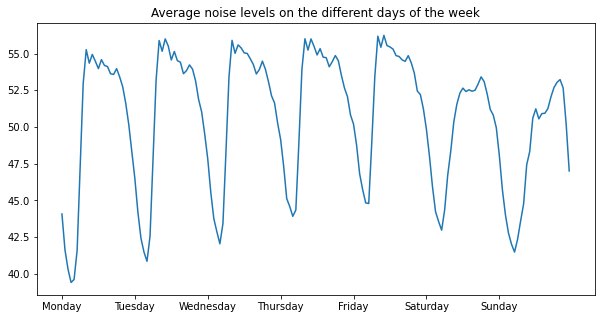

In [35]:
#Data clustered per hour
plt.figure(figsize=(10,5))
plt.plot(average_noise_df['daytime'], average_noise_df['laeq'])
plt.title("Average noise levels on the different days of the week")
plt.xticks(['Monday00:00:00', 'Tuesday00:00:00', 'Wednesday00:00:00', 'Thursday00:00:00', 'Friday00:00:00', 'Saturday00:00:00', 'Sunday00:00:00'],
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

## 2. Loading the data with dask instead of pandas

In [3]:
#Read all CSV files from March
noise_March_dask_df = dd.read_csv('NoiseData/March/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_March_dask_df

,#object_id,description,result_timestamp,lamax,laeq
npartitions=33,,,,,
,int64,object,object,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [4]:
noise_March_dask_df.head(npartitions=-1)

,#object_id,description,result_timestamp,lamax,laeq
0,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:00.462,60.5,57.9
1,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:01.462,54.1,53.2
2,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:02.462,61.4,57.5
3,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:03.462,61.3,59.1
4,255439,MP 01: Naamsestraat 35 Maxim,01/03/2022 00:00:04.462,61.1,58.4


In [5]:
len(noise_March_dask_df)

16167360

In [6]:
#Read all CSV files from all 12 months
noise_January_dask_df = dd.read_csv('NoiseData/Jan/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_February_dask_df = dd.read_csv('NoiseData/Feb/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_March_dask_df = dd.read_csv('NoiseData/March/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_April_dask_df = dd.read_csv('NoiseData/April/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_May_dask_df = dd.read_csv('NoiseData/May/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_June_dask_df = dd.read_csv('NoiseData/June/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_July_dask_df = dd.read_csv('NoiseData/Jul/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_August_dask_df = dd.read_csv('NoiseData/Aug/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_September_dask_df = dd.read_csv('NoiseData/Sep/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_October_dask_df = dd.read_csv('NoiseData/Oct/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_November_dask_df = dd.read_csv('NoiseData/Nov/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])
noise_December_dask_df = dd.read_csv('NoiseData/Dec/*.csv', sep=';', usecols=['#object_id','description','result_timestamp','lamax','laeq'])

In [7]:
#Combine all 12 dataframes
noise_dask_df = dd.concat([noise_January_dask_df,noise_February_dask_df,noise_March_dask_df,noise_April_dask_df,
                          noise_May_dask_df,noise_June_dask_df,noise_July_dask_df,noise_August_dask_df,
                          noise_September_dask_df,noise_October_dask_df,noise_November_dask_df,noise_December_dask_df])
#noise_dask_df.head(npartitions=-1)

In [ ]:
#len(noise_dask_df)

## 3. Model building

In [36]:
#Load CSV files (if necessary)
noise_per_minute_df1 = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_minute_df1.csv', sep=',')
noise_per_minute_df2 = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_minute_df2.csv', sep=',')
noise_per_minute_df3 = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_minute_df3.csv', sep=',')
noise_per_minute_df4 = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_minute_df4.csv', sep=',')
noise_per_hour_df = pd.read_csv('/Users/ineaertgeerts/opt/ModernDataAnalytics/NoiseData/noise_per_hour_df.csv', sep=',')

In [37]:
#Combine noise_per_minute dataframes
noise_per_minute_df = pd.concat([noise_per_minute_df1,noise_per_minute_df2,noise_per_minute_df3,noise_per_minute_df4])

In [38]:
noise_per_minute_df

,object_id,datetime,lamax,laeq,date,time,month,day_name,day_of_week,weekend,daytime
0,255439,2022-02-28 08:23:00,62.567647,61.132353,2022-02-28,08:23:00,2,Monday,0,False,Monday08:23:00
1,255439,2022-02-28 08:24:00,54.045000,51.596667,2022-02-28,08:24:00,2,Monday,0,False,Monday08:24:00
2,255439,2022-02-28 08:25:00,54.478333,52.070000,2022-02-28,08:25:00,2,Monday,0,False,Monday08:25:00
3,255439,2022-02-28 08:26:00,58.978333,58.123333,2022-02-28,08:26:00,2,Monday,0,False,Monday08:26:00
4,255439,2022-02-28 08:27:00,72.333333,71.656667,2022-02-28,08:27:00,2,Monday,0,False,Monday08:27:00
...,...,...,...,...,...,...,...,...,...,...,...
323496,303910,2022-12-31 23:55:00,62.956667,59.861667,2022-12-31,23:55:00,12,Saturday,5,True,Saturday23:55:00
323497,303910,2022-12-31 23:56:00,62.316667,60.060000,2022-12-31,23:56:00,12,Saturday,5,True,Saturday23:56:00
323498,303910,2022-12-31 23:57:00,63.771667,61.053333,2022-12-31,23:57:00,12,Saturday,5,True,Saturday23:57:00
323499,303910,2022-12-31 23:58:00,59.316667,57.003333,2022-12-31,23:58:00,12,Saturday,5,True,Saturday23:58:00


In [39]:
noise_per_hour_df

,object_id,datetime,lamax,laeq,date,time,month,day_name,day_of_week,weekend,daytime
0,255439,2022-02-28 08:00:00,58.679893,56.965367,2022-02-28,08:00:00,2,Monday,0,False,Monday08:00:00
1,255439,2022-02-28 13:00:00,57.610063,55.556352,2022-02-28,13:00:00,2,Monday,0,False,Monday13:00:00
2,255439,2022-02-28 14:00:00,57.101721,55.100833,2022-02-28,14:00:00,2,Monday,0,False,Monday14:00:00
3,255439,2022-02-28 15:00:00,56.258222,54.167056,2022-02-28,15:00:00,2,Monday,0,False,Monday15:00:00
4,255439,2022-02-28 16:00:00,57.101444,54.979111,2022-02-28,16:00:00,2,Monday,0,False,Monday16:00:00
...,...,...,...,...,...,...,...,...,...,...,...
55464,303910,2022-12-31 19:00:00,57.366833,55.689139,2022-12-31,19:00:00,12,Saturday,5,True,Saturday19:00:00
55465,303910,2022-12-31 20:00:00,56.131472,54.247000,2022-12-31,20:00:00,12,Saturday,5,True,Saturday20:00:00
55466,303910,2022-12-31 21:00:00,54.670528,52.724444,2022-12-31,21:00:00,12,Saturday,5,True,Saturday21:00:00
55467,303910,2022-12-31 22:00:00,55.364222,53.355944,2022-12-31,22:00:00,12,Saturday,5,True,Saturday22:00:00


#### First try models on the data of March

In [40]:
#Select the data of March
March_df = noise_per_minute_df[noise_per_minute_df['month']==3]
March_df

,object_id,datetime,lamax,laeq,date,time,month,day_name,day_of_week,weekend,daytime
637,255439,2022-03-01 00:00:00,62.230000,59.518333,2022-03-01,00:00:00,3,Tuesday,1,False,Tuesday00:00:00
638,255439,2022-03-01 00:01:00,61.503333,58.865000,2022-03-01,00:01:00,3,Tuesday,1,False,Tuesday00:01:00
639,255439,2022-03-01 00:02:00,64.036667,61.433333,2022-03-01,00:02:00,3,Tuesday,1,False,Tuesday00:02:00
640,255439,2022-03-01 00:03:00,62.131667,59.751667,2022-03-01,00:03:00,3,Tuesday,1,False,Tuesday00:03:00
641,255439,2022-03-01 00:04:00,61.995000,59.126667,2022-03-01,00:04:00,3,Tuesday,1,False,Tuesday00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
817629,280324,2022-03-31 23:55:00,45.295000,43.553333,2022-03-31,23:55:00,3,Thursday,3,False,Thursday23:55:00
817630,280324,2022-03-31 23:56:00,44.596667,42.915000,2022-03-31,23:56:00,3,Thursday,3,False,Thursday23:56:00
817631,280324,2022-03-31 23:57:00,44.940000,43.078333,2022-03-31,23:57:00,3,Thursday,3,False,Thursday23:57:00
817632,280324,2022-03-31 23:58:00,46.141667,44.515000,2022-03-31,23:58:00,3,Thursday,3,False,Thursday23:58:00
